In [ ]:
from enron_preprocess import (
    enron1, enron2, enron3, enron4, enron5, enron6
)
import sys
sys.path.append("../Handlers")
from nn_traintest import ConvolutionalNNClassifier, RecurrentNNClassifier, ArtificialNNClassifier

[nltk_data] Downloading package punkt to E:/nltk...
[nltk_data]   Package punkt is already up-to-date!


Preprocessed data saved to ./csv/preprocessed_enron1_data.csv.
Preprocessed data saved to ./csv/preprocessed_enron2_data.csv.
Preprocessed data saved to ./csv/preprocessed_enron3_data.csv.
Preprocessed data saved to ./csv/preprocessed_enron4_data.csv.
Preprocessed data saved to ./csv/preprocessed_enron5_data.csv.
Preprocessed data saved to ./csv/preprocessed_enron6_data.csv.
Preprocessed data saved to ./csv/preprocessed_merged_enron_data.csv.



In [4]:
import pandas as pd

merged_enron = pd.concat([
    enron1, enron2, enron3, enron4, enron5, enron6
], ignore_index=True)

metric_results = []
merged_enron

,Subject,Body,Label
0,christmas tree farm pictures\n,NaN,0
1,"vastar resources , inc .\n","gary , production from the high island larger ...",0
2,calpine daily gas nomination\n,- calpine daily gas nomination 1 . doc,0
3,re : issue\n,fyi - see note below - already done .\n\nstell...,0
4,meter 7268 nov allocation\n,fyi .\n\n- - - - - - - - - - - - - - - - - - -...,0
...,...,...,...
33710,= ? iso - 8859 - 1 ? q ? good _ news _ c = ed...,"hello , welcome to gigapharm onlinne shop .\n\...",1
33711,all prescript medicines are on special . to b...,i got it earlier than expected and it was wrap...,1
33712,the next generation online pharmacy .\n,are you ready to rock on ? let the man in you ...,1
33713,bloow in 5 - 10 times the time\n,learn how to last 5 - 10 times longer in\n\nbe...,1


In [5]:
subject = "Subject"
body = "Body"
enron_text = merged_enron.apply(lambda x: f"{x[subject]} {x[body]}", axis=1)

In [ ]:
cnn = ConvolutionalNNClassifier("Enron")
cnn.load_data(enron_text, merged_enron["Label"])
cnn.split(test_size=0.1, valid_size=0.1)
cnn.vectorizing()
cnn.complex_build()

Shape of the input data is (26971, 200)


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.9018 - loss: 0.2171 - precision: 0.8865 - recall: 0.9312 - val_accuracy: 0.9872 - val_loss: 0.0347 - val_precision: 0.9822 - val_recall: 0.9930
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9915 - loss: 0.0279 - precision: 0.9900 - recall: 0.9931 - val_accuracy: 0.9893 - val_loss: 0.0333 - val_precision: 0.9879 - val_recall: 0.9913
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9967 - loss: 0.0113 - precision: 0.9960 - recall: 0.9976 - val_accuracy: 0.9905 - val_loss: 0.0339 - val_precision: 0.9901 - val_recall: 0.9913
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9972 - loss: 0.0078 - precision: 0.9969 - recall: 0.9977 - val_accuracy: 0.9899 - val_loss: 0.0386 - val_precision: 0.9867 - val_recall: 0.9936
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9989 - loss: 0.0038 - precision: 0.9986 - recall: 0.9991 - val_accuracy: 0.9911 - va

CNN Enron Classification Report


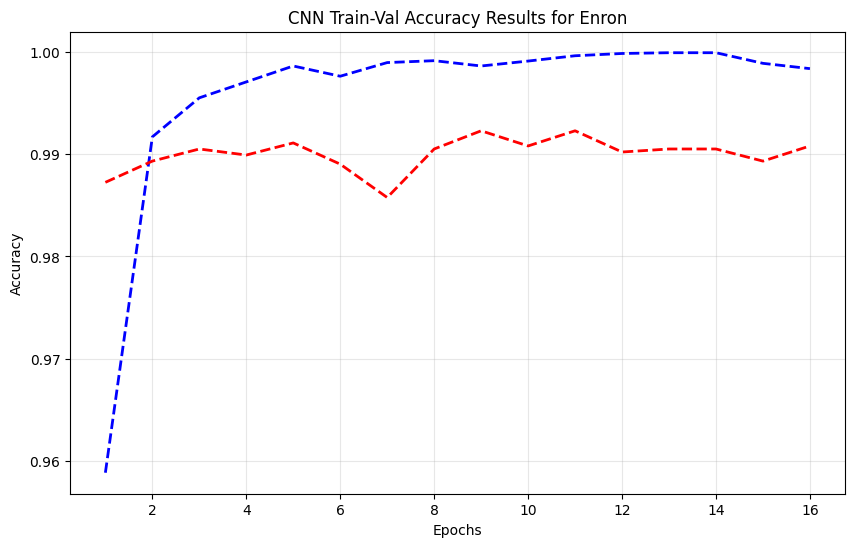

106/106 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
{'dataset': 'Enron', 'model': 'CNN', 'metrics': {'accuracy': 0.9878410438908659, 'weighted_precision': 0.9879004517319115, 'wighted_recall': 0.9878410438908659, 'weighted_f1': 0.9878393564985819, 'macro_precision': 0.9880005070431461, 'macro_recall': 0.9877296792057354, 'macro_f1': 0.9878336726508878, 'roc_auc': 0.9877296792057354}, 'confusion_matrix': array([[1624,   30],
       [  11, 1707]], dtype=int64), 'epochs': 16}


In [7]:
print("CNN Enron Classification Report")
cnn.plot_training_validation_accuracy()
metrics = cnn.evaluate()
metric_results.append(metrics)
print(metrics)
del cnn

In [ ]:
rnn = RecurrentNNClassifier("Enron")
rnn.load_data(enron_text, merged_enron["Label"])
rnn.split(test_size=0.1, valid_size=0.1)
rnn.vectorizing()
rnn.complex_build()

Shape of the input data is (26971, 200)
Epoch 1/20


e:\Python Tests\AI\.venv\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


843/843 ━━━━━━━━━━━━━━━━━━━━ 156s 177ms/step - accuracy: 0.7130 - loss: 0.5265 - precision: 0.7047 - recall: 0.7770 - val_accuracy: 0.9849 - val_loss: 0.0468 - val_precision: 0.9745 - val_recall: 0.9965
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 146s 174ms/step - accuracy: 0.9883 - loss: 0.0364 - precision: 0.9856 - recall: 0.9915 - val_accuracy: 0.9870 - val_loss: 0.0349 - val_precision: 0.9778 - val_recall: 0.9971
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 145s 172ms/step - accuracy: 0.9951 - loss: 0.0162 - precision: 0.9922 - recall: 0.9982 - val_accuracy: 0.9902 - val_loss: 0.0281 - val_precision: 0.9879 - val_recall: 0.9930
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 137s 163ms/step - accuracy: 0.9975 - loss: 0.0074 - precision: 0.9966 - recall: 0.9985 - val_accuracy: 0.9902 - val_loss: 0.0327 - val_precision: 0.9884 - val_recall: 0.9925
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 153s 181ms/step - accuracy: 0.9983 - loss: 0.0053 - precision: 0.9980 - recall: 0.9987 - val_accuracy: 0.9902 - val

RNN Enron Classification Report


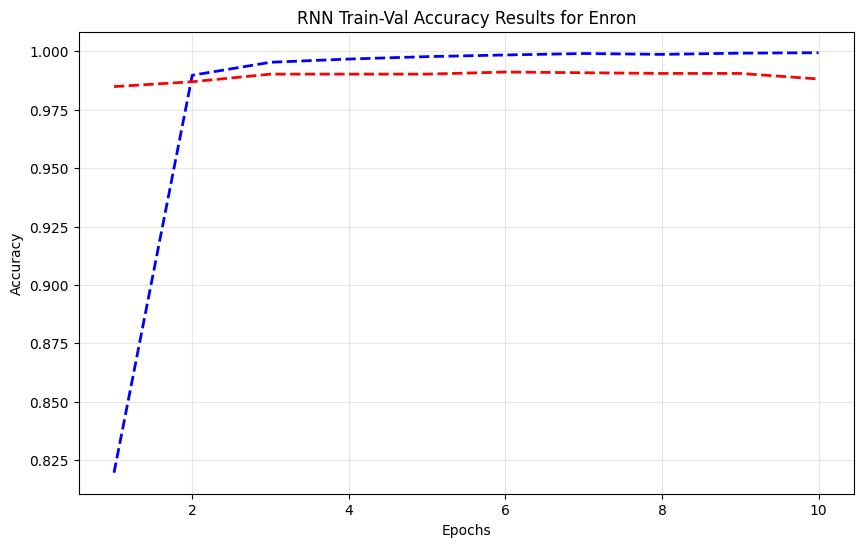

106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
{'dataset': 'Enron', 'model': 'RNN', 'metrics': {'accuracy': 0.9908066429418743, 'weighted_precision': 0.9908264094124933, 'wighted_recall': 0.9908066429418743, 'weighted_f1': 0.9908059755700828, 'macro_precision': 0.9908839118724758, 'macro_recall': 0.9907413924405224, 'macro_f1': 0.9908020926796599, 'roc_auc': 0.9907413924405223}, 'confusion_matrix': array([[1633,   21],
       [  10, 1708]], dtype=int64), 'epochs': 10}


In [9]:
print("RNN Enron Classification Report")
rnn.plot_training_validation_accuracy()
metrics = rnn.evaluate()
metric_results.append(metrics)
print(metrics)
del rnn

In [10]:
ann = ArtificialNNClassifier("Enron")
ann.load_data(enron_text, merged_enron["Label"])
ann.split(test_size=0.1, valid_size=0.1)
ann.vectorizing()
ann.build(
    hidden_layer_num=2,
    hidden_layer_sizes=[64, 64],
    epochs=20
)

Shape of the input data is (26971, 200)
Epoch 1/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8894 - loss: 0.2430 - precision: 0.8537 - recall: 0.9686 - val_accuracy: 0.9884 - val_loss: 0.0353 - val_precision: 0.9811 - val_recall: 0.9965
Epoch 2/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9950 - loss: 0.0163 - precision: 0.9932 - recall: 0.9970 - val_accuracy: 0.9899 - val_loss: 0.0325 - val_precision: 0.9840 - val_recall: 0.9965
Epoch 3/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9988 - loss: 0.0055 - precision: 0.9985 - recall: 0.9992 - val_accuracy: 0.9917 - val_loss: 0.0295 - val_precision: 0.9879 - val_recall: 0.9959
Epoch 4/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9995 - loss: 0.0027 - precision: 0.9994 - recall: 0.9995 - val_accuracy: 0.9926 - val_loss: 0.0312 - val_precision: 0.9908 - val_recall: 0.9948
Epoch 5/20
843/843 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9999 - loss: 6.3353e-04 - precision: 0.9998 - recall: 

Enron MLP Classification Report


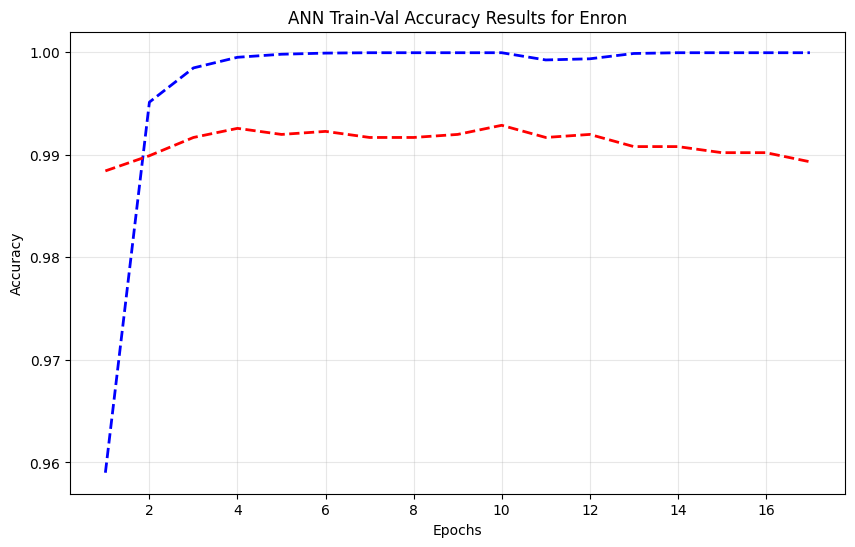

106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
{'dataset': 'Enron', 'model': 'ANN', 'metrics': {'accuracy': 0.9908066429418743, 'weighted_precision': 0.9908067121372756, 'wighted_recall': 0.9908066429418743, 'weighted_f1': 0.9908065903675429, 'macro_precision': 0.9908089263901162, 'macro_recall': 0.9907976993016541, 'macro_f1': 0.9908032256103403, 'roc_auc': 0.9907976993016541}, 'confusion_matrix': array([[1638,   16],
       [  15, 1703]], dtype=int64), 'epochs': 17}


In [11]:
print("Enron MLP Classification Report")
ann.plot_training_validation_accuracy()
metrics = ann.evaluate()
metric_results.append(metrics)
print(metrics)
del ann

In [12]:
from traintest import add_to_json_array

print(metric_results)

def convert(dic):
    dic["confusion_matrix"] = dic["confusion_matrix"].tolist()
    return dic

metric_results = list(map(convert, metric_results))

add_to_json_array("./merged_enron_classification_nn_report.json", metric_results, mode="overwrite")

[{'dataset': 'Enron', 'model': 'CNN', 'metrics': {'accuracy': 0.9878410438908659, 'weighted_precision': 0.9879004517319115, 'wighted_recall': 0.9878410438908659, 'weighted_f1': 0.9878393564985819, 'macro_precision': 0.9880005070431461, 'macro_recall': 0.9877296792057354, 'macro_f1': 0.9878336726508878, 'roc_auc': 0.9877296792057354}, 'confusion_matrix': array([[1624,   30],
       [  11, 1707]], dtype=int64), 'epochs': 16}, {'dataset': 'Enron', 'model': 'RNN', 'metrics': {'accuracy': 0.9908066429418743, 'weighted_precision': 0.9908264094124933, 'wighted_recall': 0.9908066429418743, 'weighted_f1': 0.9908059755700828, 'macro_precision': 0.9908839118724758, 'macro_recall': 0.9907413924405224, 'macro_f1': 0.9908020926796599, 'roc_auc': 0.9907413924405223}, 'confusion_matrix': array([[1633,   21],
       [  10, 1708]], dtype=int64), 'epochs': 10}, {'dataset': 'Enron', 'model': 'ANN', 'metrics': {'accuracy': 0.9908066429418743, 'weighted_precision': 0.9908067121372756, 'wighted_recall': 0.99